# **Treadmill Buyer Profile**

The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill oƯered by the company, to provide a better
recommendation of the treadmills to new customers. The team decides to investigate
whether there are diƯerences across the product with respect to customer
characteristics.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. **Data Exploration and Processing:**
 - Importing data
 - Reading dataframe
 - Check the shape of the dataframe
 - Datatype of each column
 - Missing value detection
 - Checking duplicate values in the dataset


In [3]:
treadmill_df = pd.read_csv('/content/aerofit_treadmill_data.csv')

In [ ]:
treadmill_df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
treadmill_df.shape

(180, 9)

In [ ]:
treadmill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
treadmill_df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [ ]:
treadmill_df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
treadmill_df.duplicated().sum()

0

### **2. Statistical Summary:**
- Provide an analysis of the statistical summary in few lines for both categorical and
numerical features.
- Value Counts for all categorical features
- Unique Attributes for all categorical features

In [ ]:
# categorical
treadmill_df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
#numerical
treadmill_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## **Graphical Analysis:**

### **Univariate Analysis - Numerical features:**
 - Distribution Plot
 - Count Plot
 - Box Plot

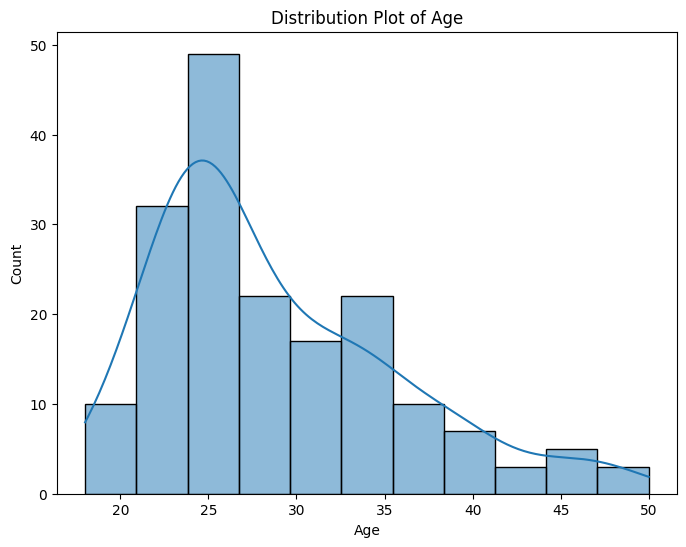

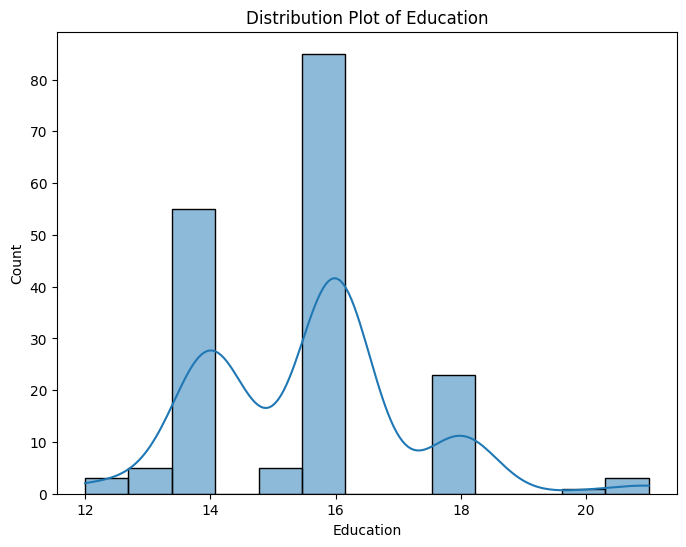

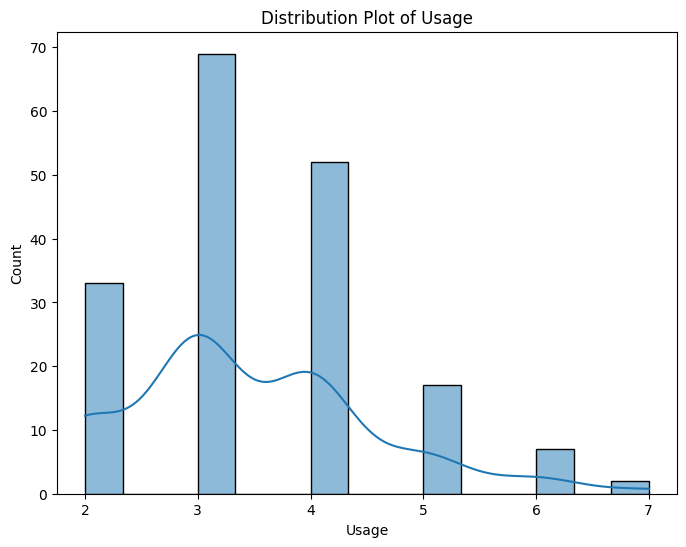

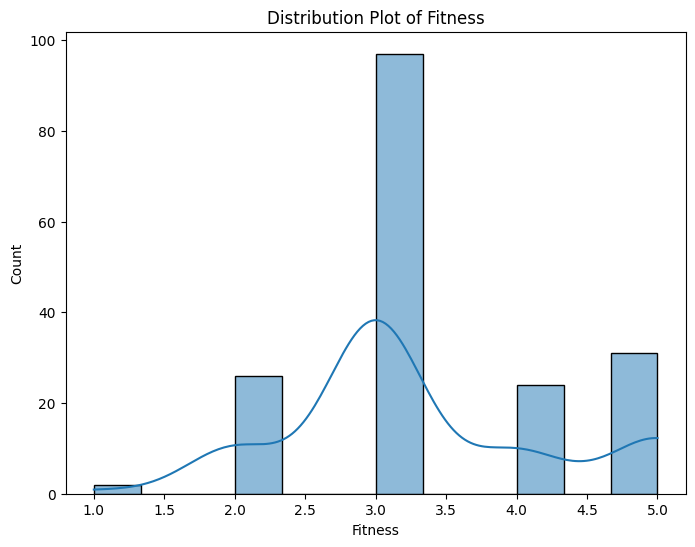

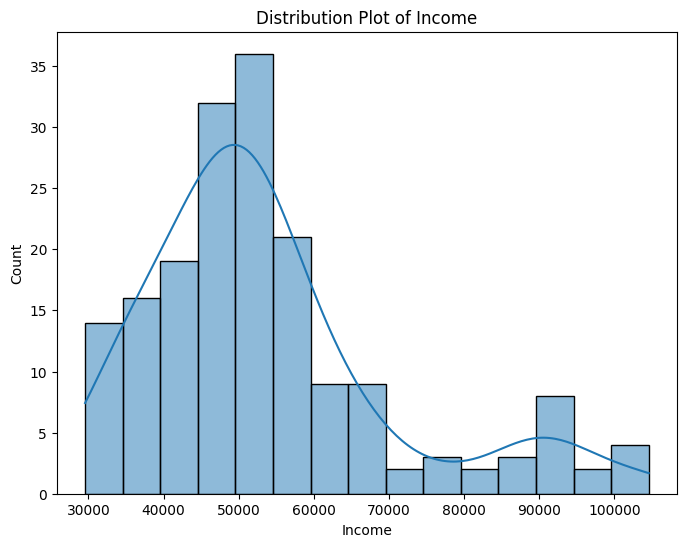

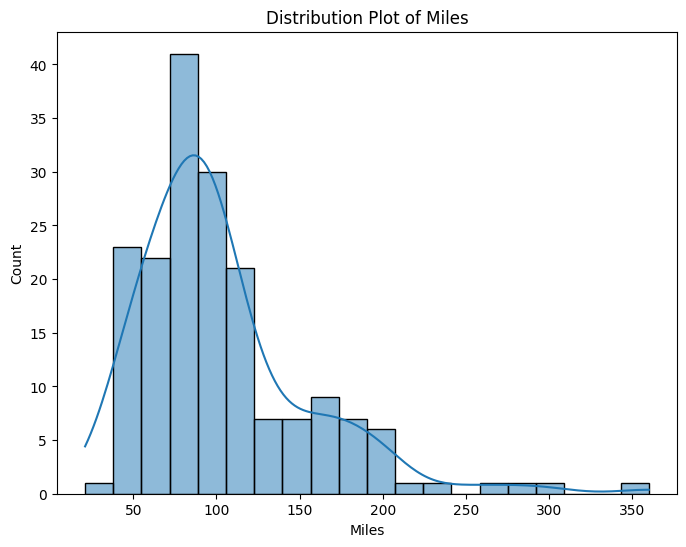

In [ ]:
# Distribution plot
numerical_features = treadmill_df.select_dtypes(include=['number']).columns


for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.histplot(treadmill_df[feature],kde=True)
    plt.title(f'Distribution Plot of {feature}')
    plt.show()

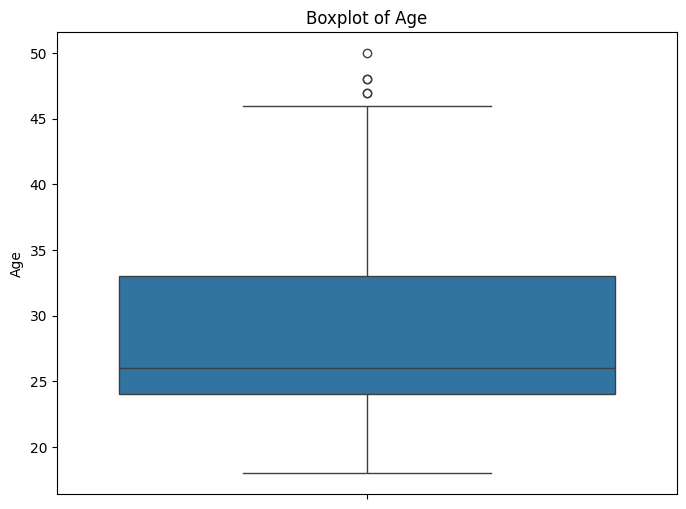

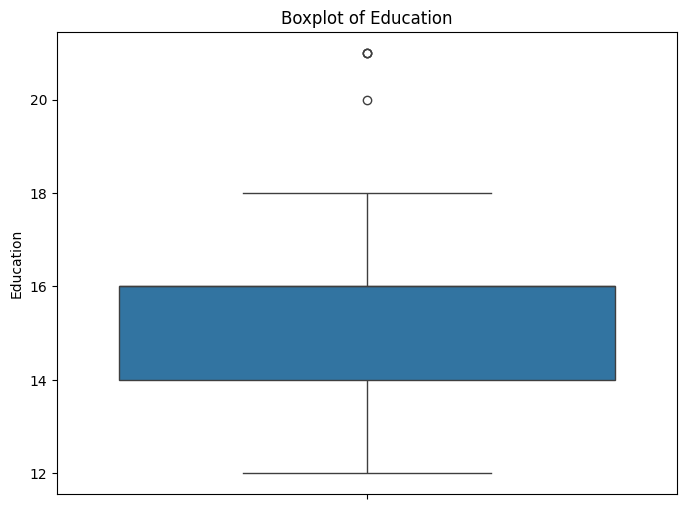

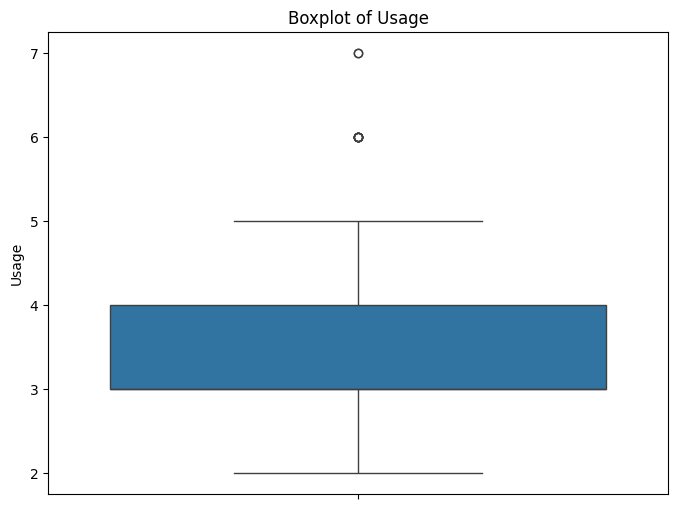

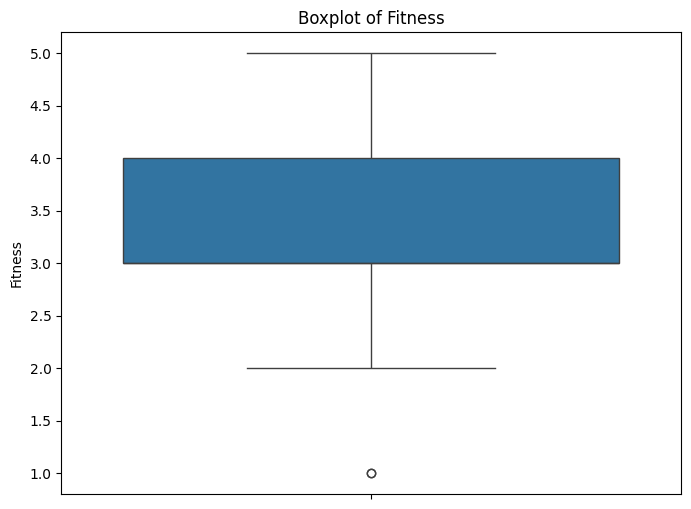

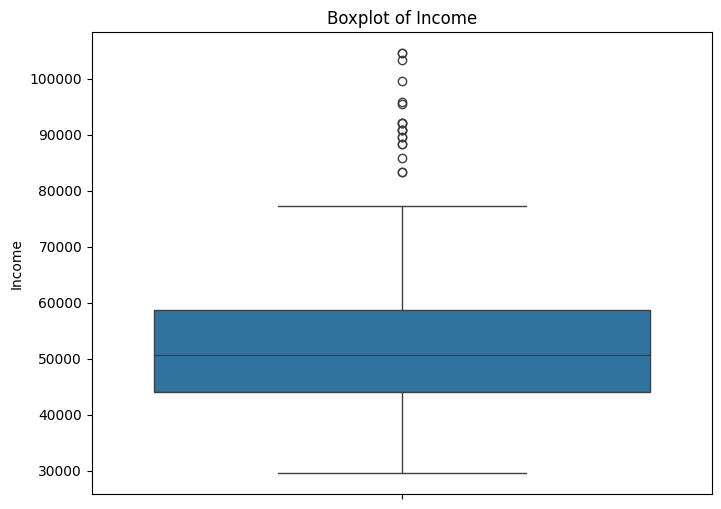

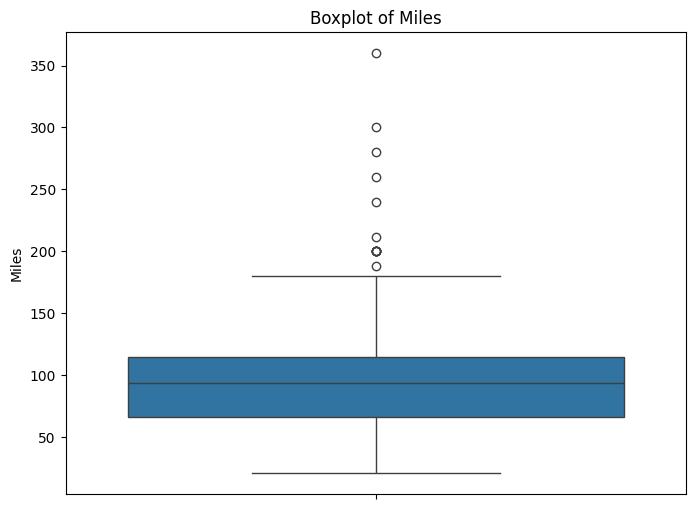

In [ ]:
# Boxplot

for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=treadmill_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()

### **Univariate - Categorical**

In [ ]:
categorical_feature =treadmill_df.select_dtypes(include=['object']).columns

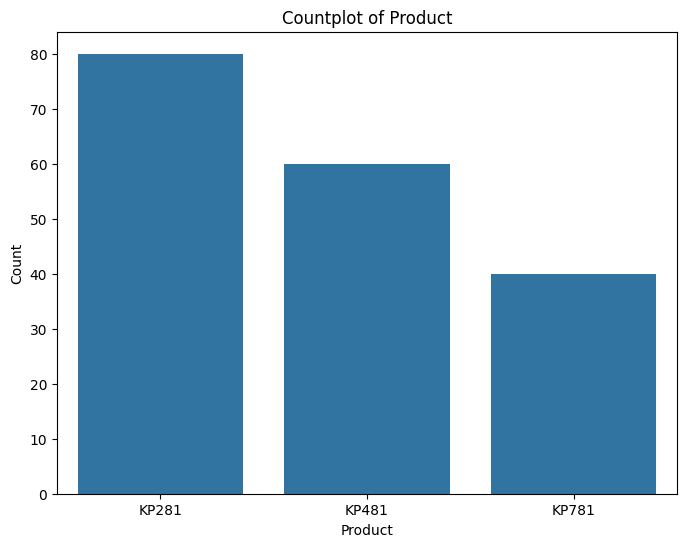

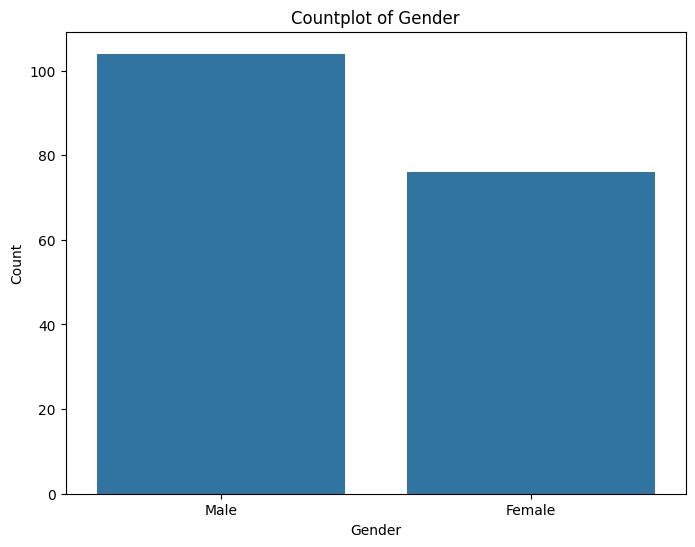

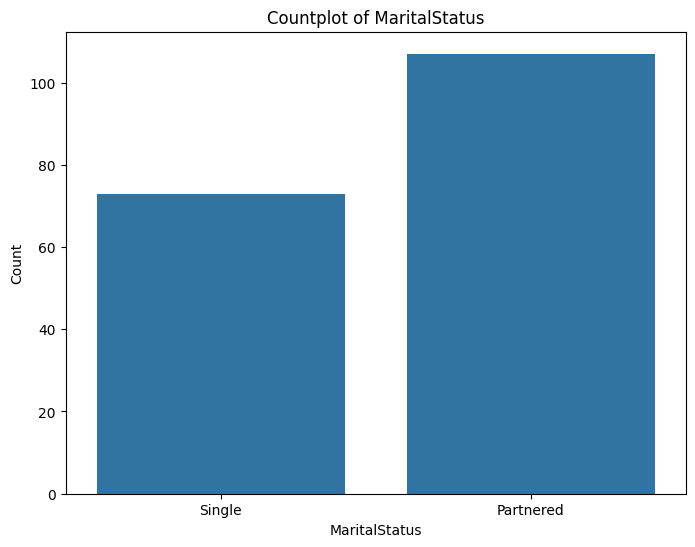

In [ ]:
# Countplot

for feature in categorical_feature:
    plt.figure(figsize=(8,6))
    sns.countplot(x=treadmill_df[feature])
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## **Bivariate Analysis**

**Product vs Age**

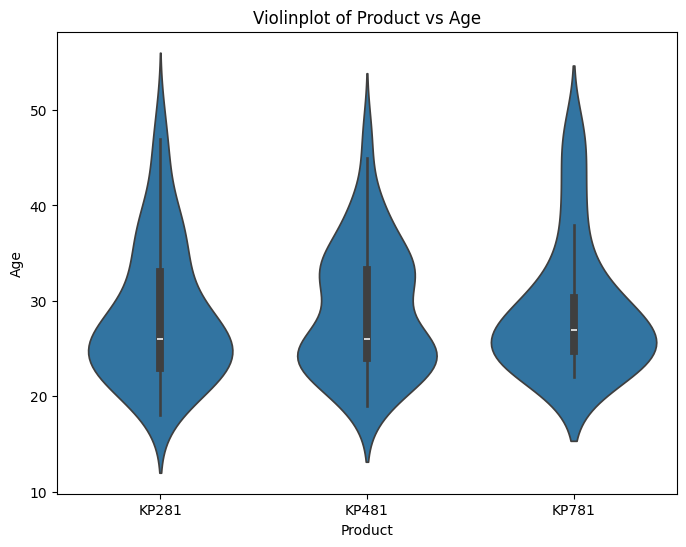

In [ ]:
# Violinplot

plt.figure(figsize=(8,6))
sns.violinplot(x='Product',y='Age',data=treadmill_df)
plt.title('Violinplot of Product vs Age')
plt.xlabel('Product')
plt.ylabel('Age')
plt.show()

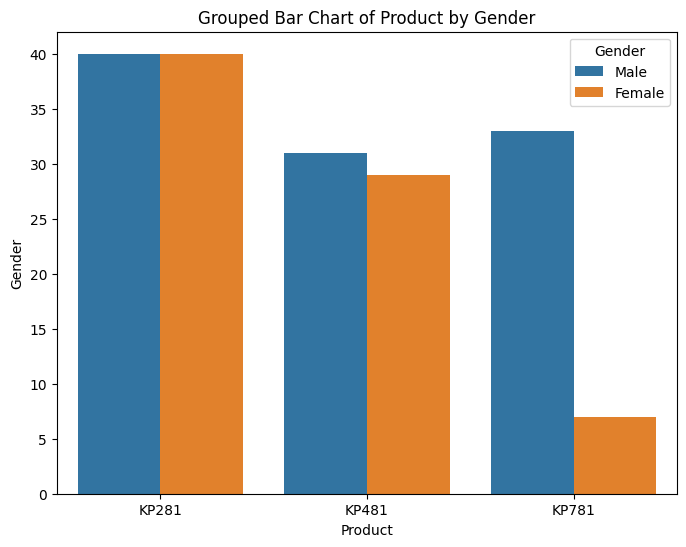

In [ ]:
# Grouped Bar Chart for Product vs Gender

plt.figure(figsize=(8,6))
sns.countplot(x='Product',hue='Gender',data=treadmill_df)
plt.title('Grouped Bar Chart of Product by Gender')
plt.xlabel('Product')
plt.ylabel('Gender')
plt.show()

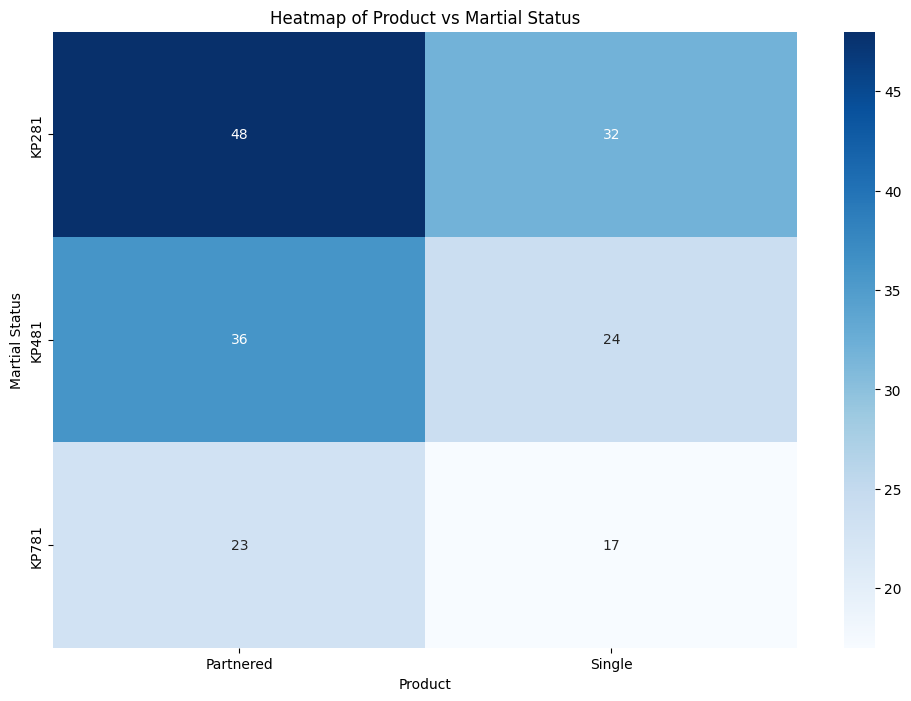

In [ ]:
# Heatmap for Product vs Martial Status
crosstab = pd.crosstab(treadmill_df['Product'],treadmill_df['MaritalStatus'])
plt.figure(figsize=(12,8))
sns.heatmap(crosstab,annot=True,cmap='Blues',fmt='d')
plt.title('Heatmap of Product vs Martial Status')
plt.xlabel('Product')
plt.ylabel('Martial Status')
plt.show()

## **Multivariate Analysis**

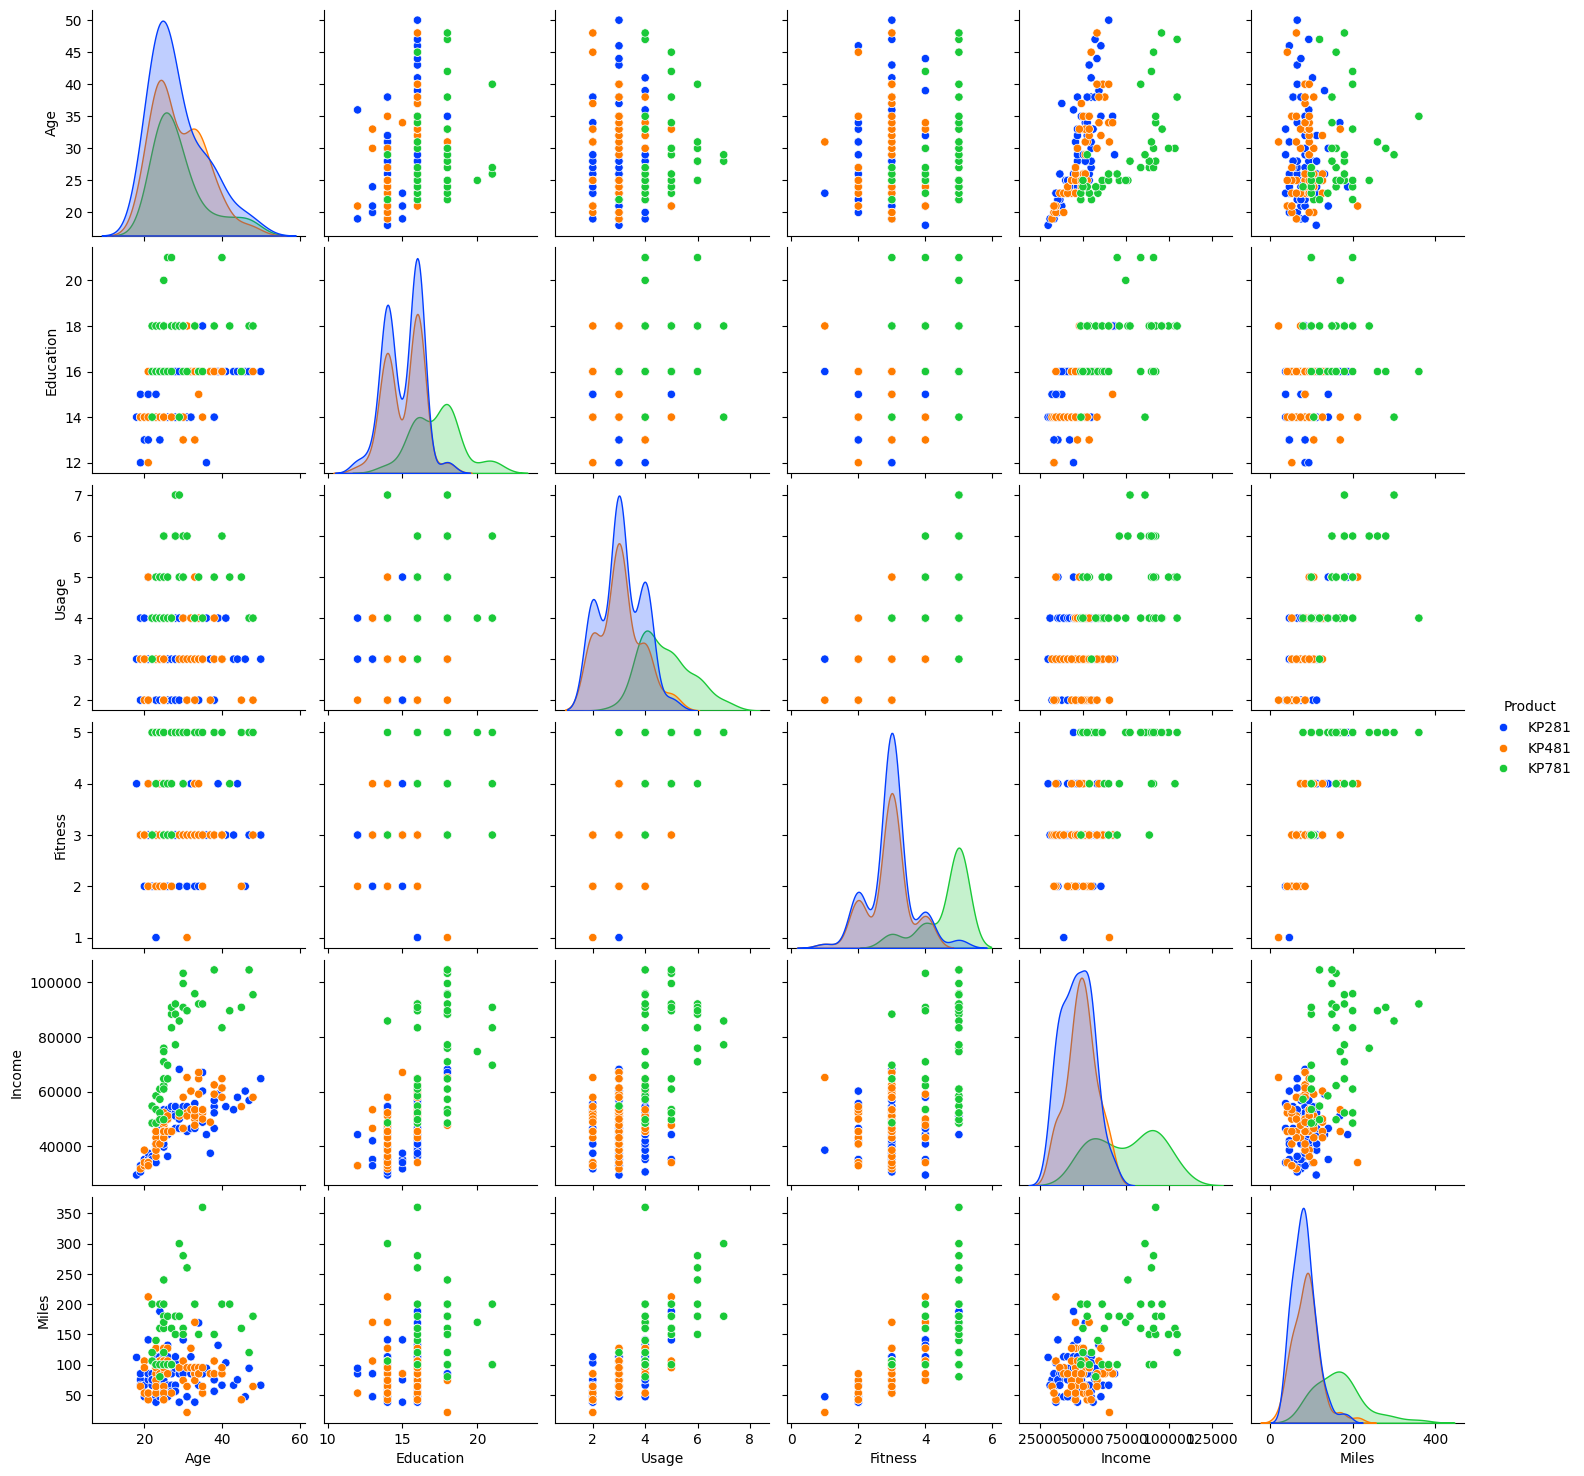

In [ ]:
# pairplot

sns.pairplot(treadmill_df,hue='Product',palette='bright')
plt.show()

## **Correlation Analysis**

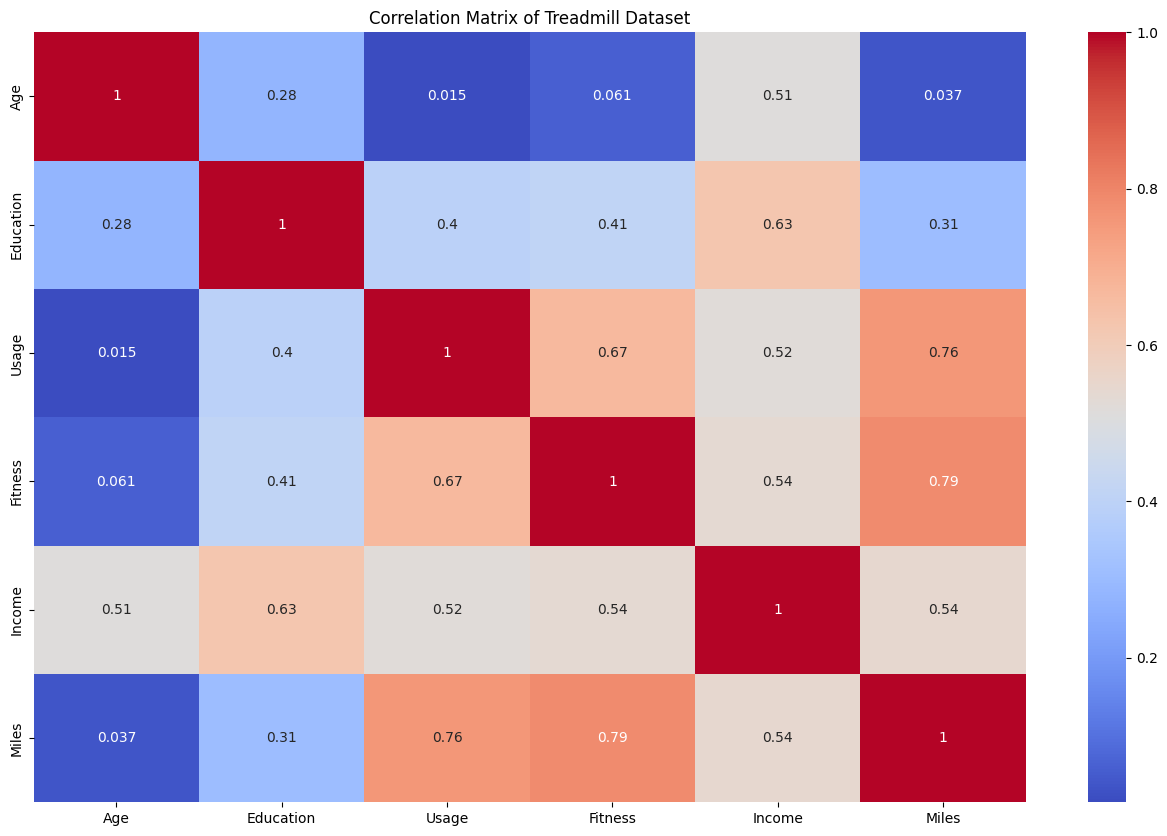

In [ ]:
correlation_matrix = treadmill_df[numerical_features].corr()

# Heatmap

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Treadmill Dataset')
plt.show()

## **Outlier Detection**

In [ ]:
Q1 = treadmill_df['Age'].quantile(0.25)
Q3 = treadmill_df['Age'].quantile(0.75)

IQR = Q3- Q1

lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5 * IQR

outliers = treadmill_df[(treadmill_df['Age'] < lower_bound) | (treadmill_df['Age'] > upper_bound)]
outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


## **Conditional Probabilities**

In [ ]:
total_customers = len(treadmill_df)


for product in treadmill_df['Product'].unique():
    product_count = len(treadmill_df[treadmill_df['Product'] == product])
    percentage =(product_count / total_customers) * 100
    print(f'Percentage of customers who purchased {product}:{percentage:.2f}%')

Percentage of customers who purchased KP281:44.44%
Percentage of customers who purchased KP481:33.33%
Percentage of customers who purchased KP781:22.22%


## **Frequency Table**

### **Product – Gender**

In [4]:
product_gender = pd.crosstab(treadmill_df['Product'],treadmill_df['Gender'],margins=True)
product_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [6]:
# percentage of male customer purchasing treadmill

male_treadmill = product_gender.loc['All','Male']
total_treadmill = product_gender.loc['All','All']
percentage_male = (male_treadmill / total_treadmill) * 100
print(f'Percentage of male customer purchasing treadmill: {percentage_male:.2f}%')

Percentage of male customer purchasing treadmill: 57.78%


In [7]:
#percentage of female customers purchasing KP781

female_KP781 = product_gender.loc['KP781','Female']
total_KP781 = product_gender.loc['KP781','All']
percentage_female_KP781 = (female_KP781 / total_KP781) * 100
print(f'Percentage of female customers purchasing KP781: {percentage_female_KP781:.2f}%')

Percentage of female customers purchasing KP781: 17.50%




```
# This is formatted as code
```

### **Product-Age**

In [8]:
product_age = pd.crosstab(treadmill_df['Product'],treadmill_df['Age'],margins=True)
product_age

Age,18,19,20,21,22,23,24,25,26,27,...,41,42,43,44,45,46,47,48,50,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,3,2,4,4,8,5,7,7,3,...,1,0,1,1,0,1,1,0,1,80
KP481,0,1,3,3,0,7,3,11,3,1,...,0,0,0,0,1,0,0,1,0,60
KP781,0,0,0,0,3,3,4,7,2,3,...,0,1,0,0,1,0,1,1,0,40
All,1,4,5,7,7,18,12,25,12,7,...,1,1,1,1,2,1,2,2,1,180


In [11]:
# Percentage of customers with Age between 20s and 30s among all customers

customers_20s_30s = product_age.loc['All',20:30].sum()
total_customers = product_age.loc['All','All']
percentage_20s_30s = (customers_20s_30s / total_customers) * 100
print(f'Percentage of customers with Age between 20s and 30s among all customers: {percentage_20s_30s:.2f}%')

Percentage of customers with Age between 20s and 30s among all customers: 63.89%


### **Product-Income**

In [21]:
product_income = pd.crosstab(treadmill_df['Product'],treadmill_df['Income'],margins=True)
product_income

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,88396,89641,90886,92131,95508,95866,99601,103336,104581,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,1,1,3,2,5,3,2,3,2,...,0,0,0,0,0,0,0,0,0,80
KP481,0,0,1,2,3,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,60
KP781,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,1,1,1,1,2,40
All,1,1,2,5,5,5,4,2,5,2,...,2,2,3,3,1,1,1,1,2,180


In [20]:
# Percentage of a low-income customer purchasing a treadmill

low_income_customers = product_income.loc['All',29562:40932].sum()
total_customers = product_income.loc['All','All']
percentage_low_income = (low_income_customers / total_customers) * 100
print(f'Percentage of a low-income customer purchasing a treadmill: {percentage_low_income:.2f}%')

Percentage of a low-income customer purchasing a treadmill: 21.11%


In [24]:
# Percentage of a high-income customer purchasing KP781 treadmill

high_income_customers = product_income.loc['All',88396:104581].sum()
percentage_high_income = (high_income_customers / total_customers) * 100
print(f'Percentage of a high-income customer purchasing KP781 treadmill: {percentage_high_income:.2f}%')

Percentage of a high-income customer purchasing KP781 treadmill: 8.89%


### **Product - Fitness**




In [25]:
product_fitness = pd.crosstab(treadmill_df['Product'],treadmill_df['Fitness'],margins=True)
product_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [26]:
# Percentage of customers that have fitness level 5

fitness_level_5 = product_fitness.loc['All',5].sum()
total_customers = product_fitness.loc['All','All']
percentage_fitness_level_5 = (fitness_level_5 / total_customers) * 100
print(f'Percentage of customers that have fitness level 5: {percentage_fitness_level_5:.2f}%')

Percentage of customers that have fitness level 5: 17.22%


### **Product - Marital Status**

In [27]:
product_maritalstatus = pd.crosstab(treadmill_df['Product'],treadmill_df['MaritalStatus'],margins=True)
product_maritalstatus

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [29]:
# Percentage of a customers who are partnered using treadmills

partnered_customers = product_maritalstatus.loc['All','Partnered'].sum()
total_customers = product_maritalstatus.loc['All','All']
percentage_partnered = (partnered_customers / total_customers) * 100
print(f'Percentage of a customers who are partnered using treadmills: {percentage_partnered:.2f}%')

Percentage of a customers who are partnered using treadmills: 59.44%


# **Results**

- The density of **age** is centered around 21-34 years.
- The density of **education** is centered around 14-16 years of education.
- The density of **usage** is 3-4 days per week.
- The density of **fitness** status on the scale of 1-5 is 3-4 selected by them at the time of buying.
- The density of **income** is centered around 40k-60k.
- The density of **miles per week** is centered around 50-110 miles.



- KP281 i the highest selling product followed by KP481 and then KP781 at the count of 80,60 and 40, respectively.
- Gender disparity is 110 males by 70 females.
- Marital Status is 110 partnered by 70 singles.



- The correlation between Usage and Miles (per week) is 0.76 which is quite high.
- Fitness and Usage are also in good positive correlation at 0.67.
- Fitness is highly correlated to Usage and Miles driven per week.

- Percentage of customers who purchased KP281:44.44%
- Percentage of customers who purchased KP481:33.33%
- Percentage of customers who purchased KP781:22.22%

# **Actionable Insights & Recommendations**

- Increase incentives for people of young age (21-34) as they account for 63% of total customers.
- the income threshold is 40k-60k. Develop more efficient and cost effective machinery to increase revenue.
- KP281 is the highest selling product across all ages due to the above characteristics. Invest more in it.
- Fitness is highly correlated to Usage and Miles per week. It is a good marketing point for health advertisement.